Let's kick things off by importing the packages I'll be using to manipulate dataframes and do some simple visualizations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the data for 
data = pd.read_csv('Data/weekly_data.csv')

In [4]:
# Set context of seaborn plots to 'talk'
sns.set_context(context = 'talk')

In [5]:
# Print the shapes of the dataframe

print('Data: ', data.shape) 
data.head(15)

Data:  (32555, 63)


,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,GameDate,Team,Opponent,HomeOrAway,Number,Name,...,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus,MatchString,Season,Week,TeamPoints,OpponentPoints,YardsFor,YardsAgainst
0,0,0.0,201810122,8283,2018-09-09T13:00:00,TB,NO,AWAY,14,Ryan Fitzpatrick,...,0.0,0.0,NaN,20181TBNO,2018,1,48.0,40.0,529.0,475.0
1,1,1.0,201810122,18878,2018-09-09T13:00:00,NO,TB,HOME,41,Alvin Kamara,...,0.0,0.0,NaN,20181NOTB,2018,1,40.0,48.0,475.0,529.0
2,2,2.0,201810122,7242,2018-09-09T13:00:00,NO,TB,HOME,9,Drew Brees,...,0.0,0.0,NaN,20181NOTB,2018,1,40.0,48.0,475.0,529.0
3,3,4.0,201810129,18082,2018-09-09T16:05:00,KC,LAC,AWAY,10,Tyreek Hill,...,0.0,0.0,NaN,20181KCLAC,2018,1,38.0,28.0,362.0,541.0
4,4,5.0,201810108,18983,2018-09-09T13:00:00,PIT,CLE,AWAY,30,James Conner,...,0.0,0.0,NaN,20181PITCLE,2018,1,21.0,21.0,472.0,327.0
5,5,6.0,201810129,8244,2018-09-09T16:05:00,LAC,KC,HOME,17,Philip Rivers,...,0.0,0.0,NaN,20181LACKC,2018,1,28.0,38.0,541.0,362.0
6,6,7.0,201810129,18890,2018-09-09T16:05:00,KC,LAC,AWAY,15,Patrick Mahomes,...,0.0,0.0,NaN,20181KCLAC,2018,1,38.0,28.0,362.0,541.0
7,7,8.0,201810122,3943,2018-09-09T13:00:00,TB,NO,AWAY,11,DeSean Jackson,...,0.0,0.0,Questionable,20181TBNO,2018,1,48.0,40.0,529.0,475.0
8,8,10.0,201810112,2593,2018-09-09T20:20:00,GB,CHI,HOME,12,Aaron Rodgers,...,0.0,0.0,Probable,20181GBCHI,2018,1,24.0,23.0,370.0,294.0
9,9,12.0,201810108,12831,2018-09-09T13:00:00,CLE,PIT,HOME,5,Tyrod Taylor,...,0.0,0.0,NaN,20181CLEPIT,2018,1,21.0,21.0,327.0,472.0


In [6]:
# Get a list of the columns present in the dataset
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'GameKey', 'PlayerID', 'GameDate', 'Team',
       'Opponent', 'HomeOrAway', 'Number', 'Name', 'Position', 'Started',
       'PassingAttempts', 'PassingCompletions', 'PassingYards',
       'PassingCompletionPercentage', 'PassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns',
       'PassingInterceptions', 'PassingRating', 'PassingLong', 'PassingSacks',
       'PassingSackYards', 'RushingAttempts', 'RushingYards',
       'RushingYardsPerAttempt', 'RushingTouchdowns', 'RushingLong',
       'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingYardsPerReception', 'ReceivingTouchdowns', 'ReceivingLong',
       'Fumbles', 'FumblesLost', 'PuntReturns', 'PuntReturnYards',
       'PuntReturnTouchdowns', 'KickReturns', 'KickReturnYards',
       'KickReturnTouchdowns', 'FieldGoalsAttempted', 'FieldGoalsMade',
       'ExtraPointsMade', 'TwoPointConversionPasses', 'TwoPointConversionRuns',
       'TwoPointConversionRecep

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32555 entries, 0 to 32554
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    32555 non-null  int64  
 1   Unnamed: 0.1                  26551 non-null  float64
 2   GameKey                       32555 non-null  int64  
 3   PlayerID                      32555 non-null  int64  
 4   GameDate                      32555 non-null  object 
 5   Team                          32555 non-null  object 
 6   Opponent                      32555 non-null  object 
 7   HomeOrAway                    32555 non-null  object 
 8   Number                        32555 non-null  int64  
 9   Name                          32555 non-null  object 
 10  Position                      32555 non-null  object 
 11  Started                       32555 non-null  int64  
 12  PassingAttempts               32555 non-null  float64
 13  P

In [8]:
data['FantasyPointsPPR'].isna().sum()

0

In [9]:
data['Week'] = data['Week'].astype(str)

In [10]:
data[data['FantasyPointsPPR'] == 0].shape

(13430, 63)

In [11]:
data.head()

,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,GameDate,Team,Opponent,HomeOrAway,Number,Name,...,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus,MatchString,Season,Week,TeamPoints,OpponentPoints,YardsFor,YardsAgainst
0,0,0.0,201810122,8283,2018-09-09T13:00:00,TB,NO,AWAY,14,Ryan Fitzpatrick,...,0.0,0.0,NaN,20181TBNO,2018,1,48.0,40.0,529.0,475.0
1,1,1.0,201810122,18878,2018-09-09T13:00:00,NO,TB,HOME,41,Alvin Kamara,...,0.0,0.0,NaN,20181NOTB,2018,1,40.0,48.0,475.0,529.0
2,2,2.0,201810122,7242,2018-09-09T13:00:00,NO,TB,HOME,9,Drew Brees,...,0.0,0.0,NaN,20181NOTB,2018,1,40.0,48.0,475.0,529.0
3,3,4.0,201810129,18082,2018-09-09T16:05:00,KC,LAC,AWAY,10,Tyreek Hill,...,0.0,0.0,NaN,20181KCLAC,2018,1,38.0,28.0,362.0,541.0
4,4,5.0,201810108,18983,2018-09-09T13:00:00,PIT,CLE,AWAY,30,James Conner,...,0.0,0.0,NaN,20181PITCLE,2018,1,21.0,21.0,472.0,327.0


### What does the distribution of fantasy points look like?

<AxesSubplot:xlabel='FantasyPointsPPR', ylabel='Count'>

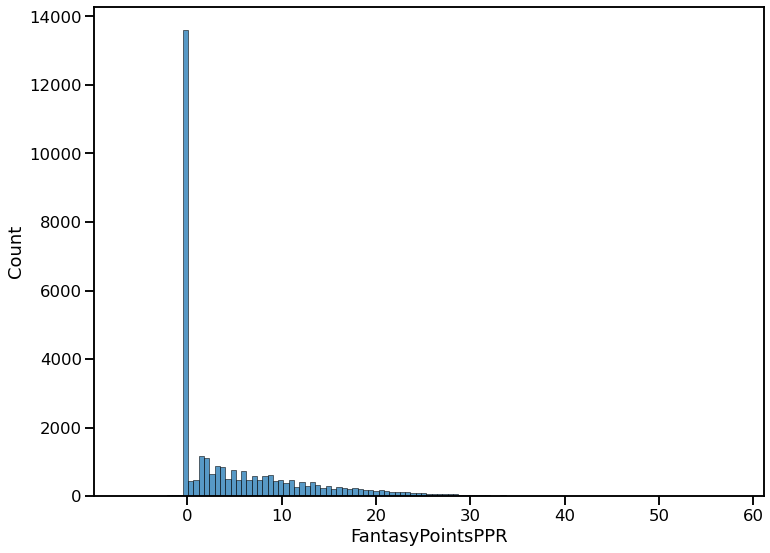

In [12]:
plt.figure(figsize = (12, 9))
sns.histplot(data['FantasyPointsPPR'])

In [13]:
data['LogFantasyPointsPPR'] = np.log(data['FantasyPointsPPR'])
data['LogFantasyPointsPPR'].isna().sum()

287

<AxesSubplot:xlabel='LogFantasyPointsPPR', ylabel='Count'>

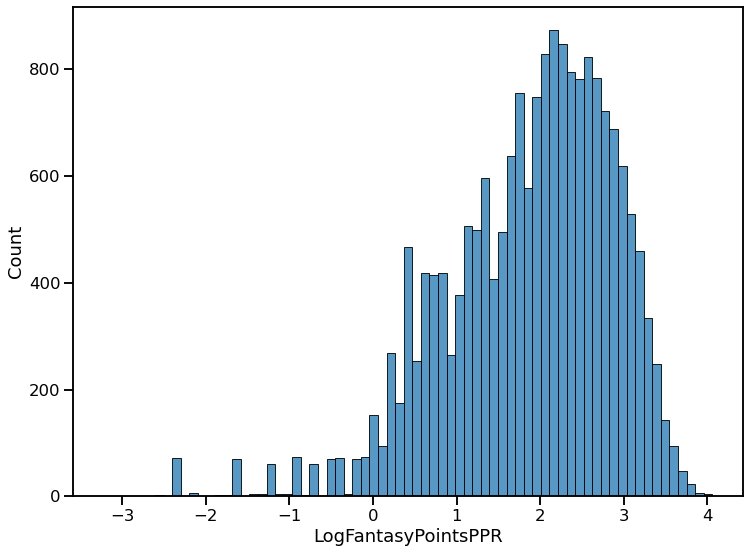

In [14]:
# Plot the log-transformed target (FantasyPointsPPR)
plt.figure(figsize = (12, 9))
sns.histplot(data['LogFantasyPointsPPR'])

### Yardage Contribution

Make a column, 'TotalYards' for the total yards accumulated by a player through rushing, receiving and passing.
Define a function that calculates the percentage of team yardage gains that a player contributed to.

In [15]:
data['TotalYards'] = data['RushingYards'] + data['ReceivingYards'] + data['PassingYards']
data.describe()

,Unnamed: 0,Unnamed: 0.1,GameKey,PlayerID,Number,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,...,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,Season,TeamPoints,OpponentPoints,YardsFor,YardsAgainst,LogFantasyPointsPPR,TotalYards
count,32555.000000,26551.000000,3.255500e+04,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,...,32555.000000,32555.000000,32555.000000,32555.000000,32150.000000,32150.000000,32150.000000,32150.000000,3.226800e+04,32555.000000
mean,16277.000000,755.389213,2.019508e+08,17654.603532,35.871172,0.334204,2.028045,1.311289,14.739794,4.464451,...,0.028782,0.025987,0.011427,2019.399355,23.521555,23.575614,352.106252,352.427776,-inf,36.052404
std,9397.963343,530.216316,1.056473e+05,4088.601857,31.659035,0.471719,8.248802,5.387068,61.150542,16.978114,...,0.201062,0.191836,0.119097,1.057291,10.189377,10.174024,87.229841,87.069098,NaN,68.711662
min,0.000000,0.000000,2.018101e+08,462.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,...,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,47.000000,47.000000,-inf,-28.000000
25%,8138.500000,261.000000,2.018117e+08,16305.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2018.000000,17.000000,17.000000,292.000000,292.000000,NaN,0.000000
50%,16277.000000,717.000000,2.019116e+08,18890.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2019.000000,24.000000,24.000000,354.000000,354.000000,6.931472e-01,4.000000
75%,24415.500000,1196.500000,2.020114e+08,20250.000000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2020.000000,31.000000,31.000000,412.000000,413.000000,2.197225e+00,43.000000
max,32554.000000,1905.000000,2.021112e+08,23101.000000,89.000000,1.000000,68.000000,45.000000,517.000000,100.000000,...,4.000000,3.000000,3.000000,2021.000000,59.000000,59.000000,643.000000,643.000000,4.058717e+00,517.000000


In [16]:
def offensive_contribution(team_yards, player_yards):
    
    """
    Calculate a percentage for the percentage of team yards that a player contributes to.
    
    Input:  
        - Dataframe to use in the calculation
        
    Output:
        - New dataframe column with the desired contribution score
    """
    contribution = player_yards / team_yards
    if contribution > 1.0:
        return 1.0
    else:
        return contribution   

In [17]:
data['YardageContribution'] = data.apply(lambda x: offensive_contribution(x['YardsFor'], x['TotalYards']), axis = 1)
data[['Name','Team', 'Opponent','HomeOrAway','RushingYards', 'PassingYards', 'ReceivingYards', 'TotalYards',
      'YardsFor','YardsAgainst', 'YardageContribution', 'MatchString']].sort_values(by = 'YardageContribution',
                ascending = False).head(5)

,Name,Team,Opponent,HomeOrAway,RushingYards,PassingYards,ReceivingYards,TotalYards,YardsFor,YardsAgainst,YardageContribution,MatchString
7888,Blake Bortles,JAX,HOU,AWAY,15.0,107.0,0.0,122.0,119.0,342.0,1.0,201817JAXHOU
24755,Matt Ryan,ATL,TB,HOME,16.0,356.0,0.0,372.0,369.0,416.0,1.0,202015ATLTB
6106,Cody Kessler,JAX,TEN,AWAY,17.0,240.0,0.0,257.0,255.0,426.0,1.0,201814JAXTEN
27606,Tom Brady,TB,LAR,AWAY,14.0,432.0,0.0,446.0,446.0,407.0,1.0,20213TBLAR
10099,Kirk Cousins,MIN,CHI,AWAY,0.0,233.0,0.0,233.0,222.0,269.0,1.0,20194MINCHI


<AxesSubplot:xlabel='ReceivingYards', ylabel='FantasyPointsPPR'>

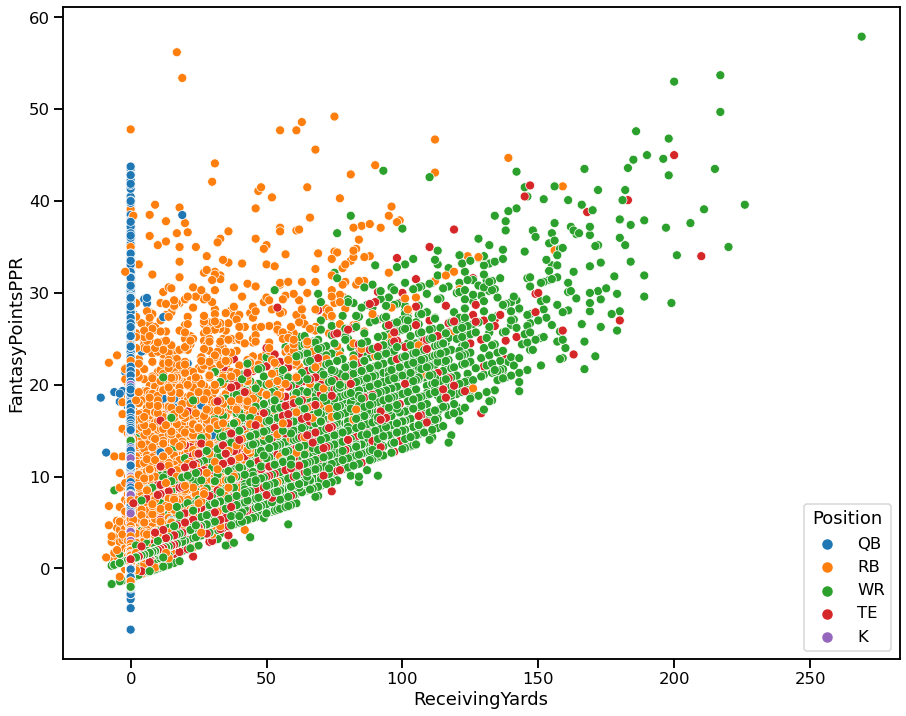

In [18]:
plt.figure(figsize = (15, 12))
sns.scatterplot(x =(data['ReceivingYards']),
               y = data['FantasyPointsPPR'],
               hue = data['Position'])

[Text(0.5, 1.0, 'Fantasy Points as a Function of Yardage Contribution'),
 Text(0, 0.5, 'Fantasy Points (PPR)')]

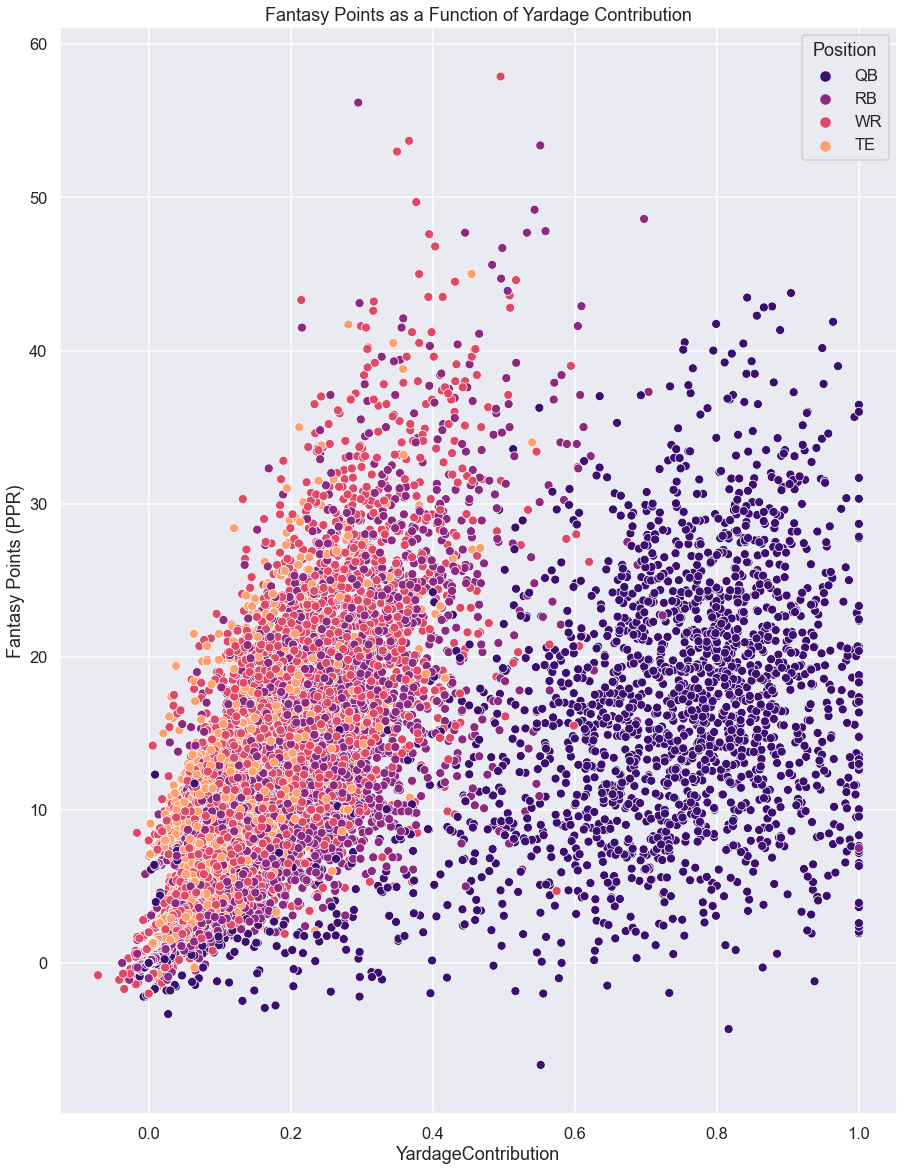

In [61]:
sns.set_context(context = 'talk')
plt.figure(figsize = (15, 20))
sns.scatterplot(x =(data['YardageContribution']),
               y = data['FantasyPointsPPR'],
               hue = data[data['Position'] != 'K']['Position'],
               palette = 'magma').set(title = 'Fantasy Points as a Function of Yardage Contribution',
                                      ylabel = 'Fantasy Points (PPR)')

### Rushing Yards
Let's explore the relatinship between rushing yards per game and mean fantasy points over the course of the season.  <br>
As seen below, it is obvious that the number of rushing yards a player obtains sets the floor for a minimum number of fantasy points obtained.

In [20]:
# Filter only players at the running back position
running_backs = data[data['Position'] == 'RB'][['Name', 'RushingYards','FantasyPointsPPR', 'LogFantasyPointsPPR']]

# Group all statistics for individual players at the position by mean value
running_backs.groupby('Name').mean().sort_values(by = 'RushingYards', ascending = False).head(10)

,RushingYards,FantasyPointsPPR,LogFantasyPointsPPR
Name,,,
Derrick Henry,99.339286,18.256429,NaN
Jonathan Taylor,84.785714,19.175000,NaN
Nick Chubb,79.000000,14.405357,NaN
Ezekiel Elliott,76.118644,17.856949,NaN
Dalvin Cook,74.181818,16.885455,NaN
Joe Mixon,71.705882,15.372549,NaN
Todd Gurley,65.875000,18.484375,NaN
Najee Harris,64.363636,18.172727,2.806015
James Robinson,63.851852,14.911111,NaN


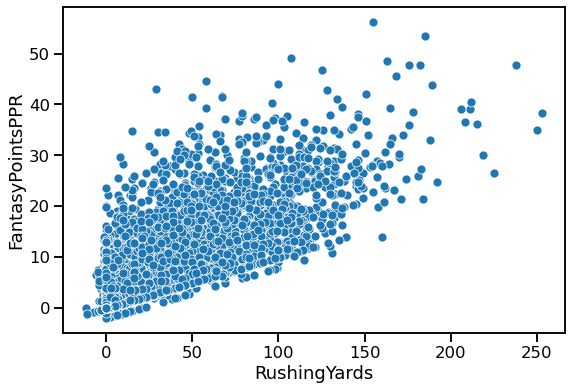

In [21]:
# Plot fantasy point production against rushing yards
plt.figure(figsize = (9,6))
sns.scatterplot(x = running_backs['RushingYards'],
        y = running_backs['FantasyPointsPPR'])
plt.xlabel = ('Mean Rushing Yards')
plt.ylabel = ('Mean Fantasy Points (PPR)')
plt.title = ('Impact of Rushing Yards on Fantasy Point Production')

### Touchdowns

Let's explore the comparative impact that a touchdown has on the performance of a player.

In [22]:
# Create a new column for total touchdowns
TD_sum = data['ReceivingTouchdowns'] + data['RushingTouchdowns'] + data['PassingTouchdowns']
data['TotalTouchdowns'] = TD_sum

# Group the data by player and get the averages
touchdowns = data[['Name', 'TotalTouchdowns', 'FantasyPointsPPR','LogFantasyPointsPPR', 'Position']]
touchdowns = touchdowns.groupby(['Name', 'Position']).mean().sort_values(by='TotalTouchdowns', ascending = False)
touchdowns.reset_index(inplace = True)
touchdowns.head(10)

,Name,Position,TotalTouchdowns,FantasyPointsPPR,LogFantasyPointsPPR
0,Patrick Mahomes,QB,2.474576,22.174915,NaN
1,Andrew Luck,QB,2.437500,20.495000,2.962654
2,Justin Herbert,QB,2.296296,21.420000,NaN
3,Tom Brady,QB,2.237288,19.124068,2.838484
4,Russell Wilson,QB,2.214286,20.000714,2.909085
5,Aaron Rodgers,QB,2.183333,19.992333,NaN
6,Josh Allen,QB,2.086207,19.858966,NaN
7,Drew Brees,QB,2.045455,16.800455,NaN
8,Dak Prescott,QB,2.020833,20.040833,NaN
9,Kirk Cousins,QB,2.000000,17.816271,NaN


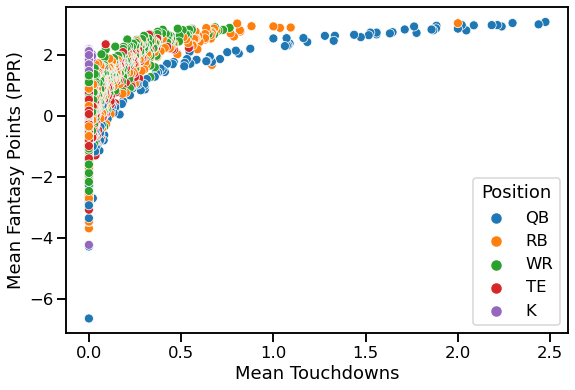

In [23]:
# Plot fantasy point production against total touchdowns
plt.figure(figsize = (9,6))
ax = sns.scatterplot(x = touchdowns['TotalTouchdowns'],
                y = np.log(touchdowns['FantasyPointsPPR']),
                    hue = touchdowns['Position'])
ax.set(xlabel = 'Mean Touchdowns', 
       ylabel = 'Mean Fantasy Points (PPR)')
plt.title = ('Impact of Touchdowns on Fantasy Point Production')

From the above chart, we can see that the position most dependent on touchdowns is the quarterback, followed in order by the running back, wide receiver, tight end and finally the kicker.

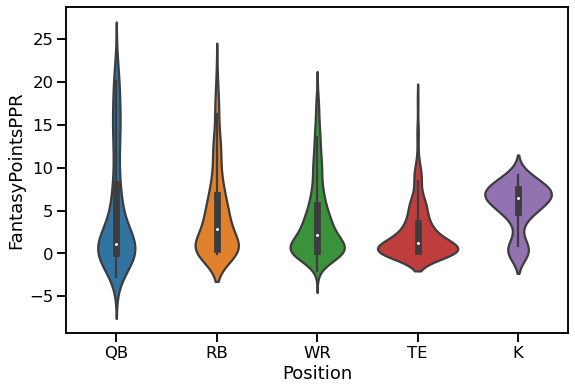

In [24]:
# Let's visualize this same data a little differently using a violin plot

plt.figure(figsize = (9, 6))
ax = sns.violinplot(x = touchdowns['Position'],
                y = touchdowns['FantasyPointsPPR'])

### Does Home Field Advantage Matter?

<AxesSubplot:xlabel='Week', ylabel='FantasyPointsPPR'>

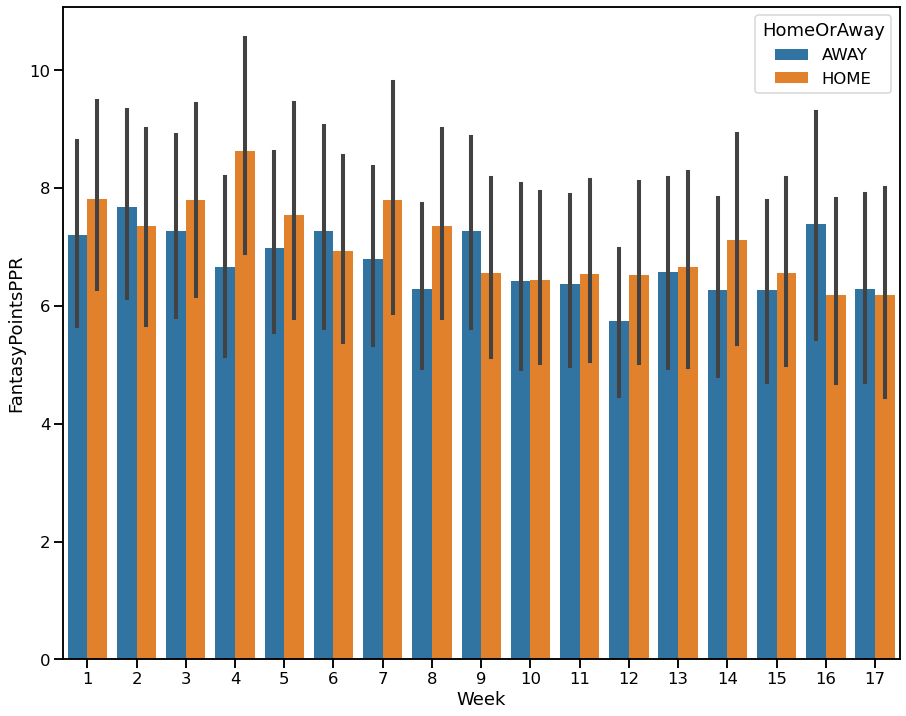

In [25]:
plt.figure(figsize = (15, 12))
sns.barplot(x = data["Week"],
           y = data[data['Position'] == 'QB']['FantasyPointsPPR'],
           hue = data["HomeOrAway"])

### What kind of impact does a player's team have on fantasy output?  How about their opponent?

<AxesSubplot:xlabel='Team', ylabel='FantasyPointsPPR'>

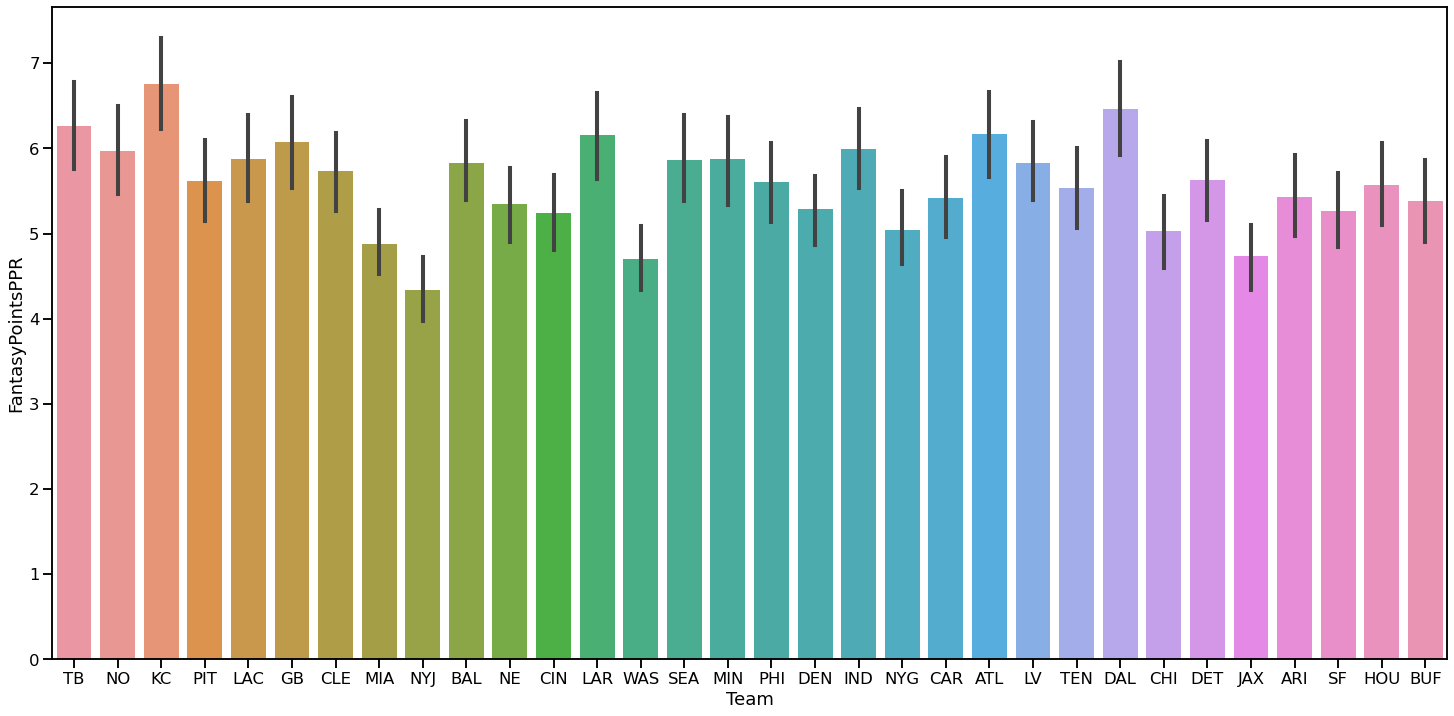

In [26]:
plt.figure(figsize = (25, 12))
sns.barplot(x = data["Team"],
           y = (data['FantasyPointsPPR']))

<AxesSubplot:xlabel='Opponent', ylabel='FantasyPointsPPR'>

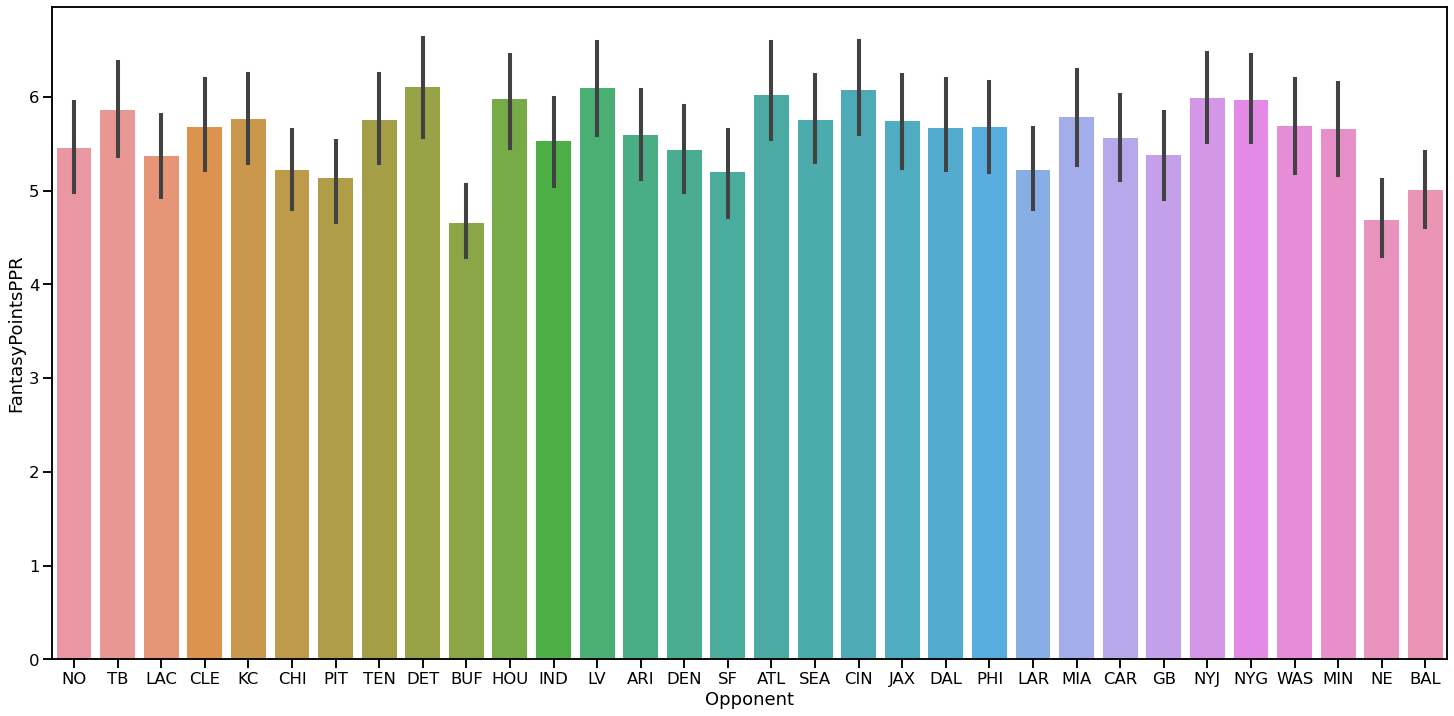

In [27]:
plt.figure(figsize = (25, 12))
sns.barplot(x = data["Opponent"],
           y = data['FantasyPointsPPR'])

### What is going on in the InjuryStatus column?

In [28]:
data['InjuryStatus'].unique()

array([nan, 'Questionable', 'Probable', 'Out', 'Doubtful'], dtype=object)

We can see that healthy players get a description of NaN, while any player with an injury designation is given a value.

<br>
<br>

### Create a function to create a trailing average or sum for a particular statistic

Using trailing aggregate statistics will be an important tool for predicting the future performance of players.  <br>
Below I will define a function that will be the basis for many of the transformations I will perform.

In [29]:
def trailing_stats_mean(df, column, window):
    
    """
    Function to create a new column with a trailing aggregate mean
    as a new feature for prediction.
    
    Inputs:
        - df: The dataframe on which the function will be applied
        - Column: The column on which to apply the function
        - Window: The number of past values to consider when apply the function

        
    Output:
        - An aggregate value
        
    """
    # Get all unique players in the DataFrame
    players = df['Name'].unique().tolist()
    
    # Define a DataFrame to hold our values
    df_out = pd.DataFrame()
    # Loop through the unique players
    for player in players:
        # Create a temporary dataframe for each player
        temp_df = df[df['Name'] == player]
        # Calculate the n game trailing average for all players.  Set closed parameter to 'left'
        # so that the current value for fantasy points is not included in the calculation.
        # Backfill the two resulting NaN values
        temp_df[f'TA{column}'] = temp_df[column].rolling(window = window,
                                                                     closed = 'left').mean().fillna(method = 'bfill')
        # Append the temporary dataframe to the output
        df_out = df_out.append(temp_df)
    # Return a dataframe with the values sorted by the original index
    return df_out.sort_index()
    


Create some trailing aggregate stats that can be used as predictive indicators of future player performance.

In [30]:
trailing_columns =  ['TotalTouchdowns','RushingYards','PassingInterceptions','PassingTouchdowns','PassingRating','PassingYards',
                      'PassingCompletionPercentage', 'PassingLong','RushingYards', 'RushingTouchdowns', 'RushingLong',
                      'RushingYardsPerAttempt', 'ReceivingYardsPerReception', 'PuntReturns', 'PuntReturnTouchdowns',
                      'Receptions','ReceivingYards','ReceivingTargets', 'ReceivingTouchdowns', 'ExtraPointsMade', 'FieldGoalsMade',
                      'FieldGoalsMade40to49','FieldGoalsMade50Plus','Fumbles','FumblesLost', 'TeamPoints', 'OpponentPoints', 'YardsFor', 'YardsAgainst', 'FantasyPointsPPR']

In [31]:
# Apply the above function to the columns I want to use to create trailing indicators for

df_rolling = data
for col in trailing_columns:
    df_rolling = trailing_stats_mean(df_rolling, col, 7)





In [32]:
trailing_stats = []
for col in trailing_columns:
    trailing_stats.append('TA' + col)


In [33]:
df_rolling[df_rolling['Name'] == 'Tyreek Hill'][['Receptions', 'TAReceptions']]

,Receptions,TAReceptions
3,7.0,5.857143
516,5.0,5.857143
1109,2.0,5.857143
1577,9.0,5.857143
1952,4.0,5.857143
2303,7.0,5.857143
2800,7.0,5.857143
3279,3.0,5.857143
3707,4.0,5.285714
4074,7.0,5.142857


Check the NaN values for the new column that we've created.  Turns out that they are rooking players who don't have enough games under their belt to have a 3 point average.  I will have to figure out the best strategy for dealing with these guys.  I can either drop them or I can impute a median value for their performances.

In [34]:

df_rolling[df_rolling['TAFantasyPointsPPR'].isna()].groupby('Name')['Name'].value_counts().head()

Name                Name              
Aaron Parker        Aaron Parker          1
Adam Prentice       Adam Prentice         1
Adrian Killins Jr.  Adrian Killins Jr.    2
Alex Bachman        Alex Bachman          4
Alex Ellis          Alex Ellis            5
Name: Name, dtype: int64

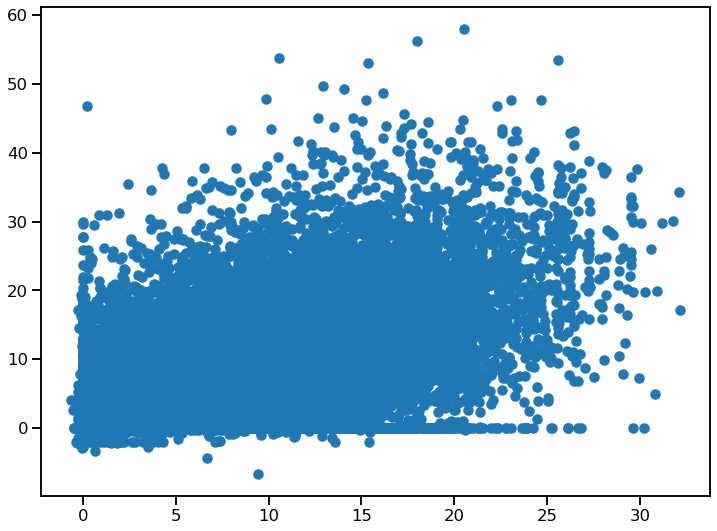

In [35]:
# Let's compare actual fantasy points to the trailing fantasy points values
plt.figure(figsize = (12,9))
plt.scatter(df_rolling['TAFantasyPointsPPR'],
        df_rolling['FantasyPointsPPR'])

<br> <br>
### Ranking players by tier
In fantasy football, it is common practice to refer to players by their tier level at a given position.  For example, a running back who is expected to average around 18 points in a given week is considered an RB1.  If a player is expected to get 15 points, we refer to them as an RB2 and so on.  Let's explore this idea to see if it carries any weight for trying to make our predictions.  Rather than assigning a player a permanent value, let's use their rolling fantasy points average to assign a tier.  Could explore using a a larger window for this assignment.

In [36]:
def tier_maker(position, points):
    
    """
    Take in two arguments:
    
     - Position: Column of the dataframe holding the player position
     - Points: Trailing average of fantasy points for a given player
    
    Classify players at every position to a tier based on their recent 
    performance (Trailing average fantasy points). Classifications will work
    as follows.
    
    Running Back:
        -RB1: Trailing average greater than 18pts
        -RB2: Trailing average between 12 and 18 pts
        -RB3: Trailing average between 8 and 12 pts
        -RB4: Trailing average below 8 pts
        
    Wide Receiver:
        -WR1: Trailing average greater than 18pts
        -WR2: Trailing average between 12 and 18 pts
        -WR3: Trailing average between 8 and 12 pts
        -WR4: Trailing average below 8 pts
        
    Tight End:
        -TE1: Trailing average greater than 15pts
        -TE2: Trailing average between 10 and 15 pts
        -TE3: Trailing average below 10 pts
        
    Quarterback:
        -QB1: Trailing average greater than 24pts
        -QB2: Trailing average between 18 and 24pts
        -QB3: Trailing average between 12 and 18pts
        -QB4: Trailing average below 12 pts
    
    Kicker:
        - K1: Trailing average greater than 10 pts
        - K2: Trailing average between 7 and 10 points
        - K3: Trailing average below 7 points
        """

    # Let's make tier assignments for running backs
    if position == 'RB':
        if points > 16:
            return 'RB1'
        elif 12 < points <= 16:
            return 'RB2'
        elif 8 < points <= 12:
            return 'RB3'
        else:
            return 'RB4'
            
    # Let's make tier assignments for wide receivers
    if position == 'WR':
        if points > 16:
            return 'WR1'
        elif 12 < points <= 16:
            return 'WR2'
        elif 8 < points <= 12:
            return 'WR3'
        else:
            return 'WR4'
            
    # Let's make tier assignments for tight ends
    if position == 'TE':
        if points > 12:
            return 'TE1'
        elif 6 < points <= 12:
            return 'TE2'
        else:
            return 'TE3'
    
    # Let's make tier assignments for quarterbacks
    if position == 'QB':
        if points > 22:
            return 'QB1'
        elif 16 < points <= 22:
            return 'QB2'
        elif 8 < points <= 14:
            return 'QB3'
        else:
            return 'QB4'

    # Let's make tier assignments for kickers
    if position == 'K':
        if points > 8:
            return 'K1'
        elif 4 < points <= 8:
            return 'K2'
        else:
            return 'K3'
    
    # If noting is returned before this point, return np.nan
    return np.nan

In [37]:
# Apply the tier_maker_df() function to the dataframe

df_rolling['PlayerTier']= df_rolling.apply(lambda x: tier_maker(x['Position'], x['TAFantasyPointsPPR']), axis = 1)

In [38]:
df_rolling[['TATotalTouchdowns','TAFantasyPointsPPR']].head(20)

,TATotalTouchdowns,TAFantasyPointsPPR
0,2.000000,17.142857
1,1.285714,26.442857
2,2.285714,21.371429
3,1.000000,21.571429
4,1.285714,25.600000
5,2.428571,20.888571
6,3.428571,27.274286
7,0.714286,16.757143
8,1.857143,21.274286
9,0.428571,5.854286


<br>

### Let's Investigate How Well the Tiers Delineate Players 

In [69]:
# Make a list of unique positions
positions = df_rolling['Position'].unique().tolist()

# Create a dataframe summarizing weekly performance by tier
df_tier = df_rolling[['Name','Week','Position','PlayerTier', 'FantasyPointsPPR', 'TAFantasyPointsPPR']].groupby(['Week','Name','Position', 'PlayerTier']).mean().reset_index()
df_tier = df_tier[df_tier['Position'] != 'K']
df_tier['Week'] = df_tier['Week'].astype(int)
df_tier.head()

,Week,Name,Position,PlayerTier,FantasyPointsPPR,TAFantasyPointsPPR
0,1,A.J. Brown,WR,WR1,11.9,18.292857
1,1,A.J. Brown,WR,WR3,13.0,9.357143
2,1,A.J. Dillon,RB,RB4,2.5,2.878571
3,1,A.J. Green,WR,WR3,10.1,8.385714
4,1,A.J. Green,WR,WR4,4.5,6.957143


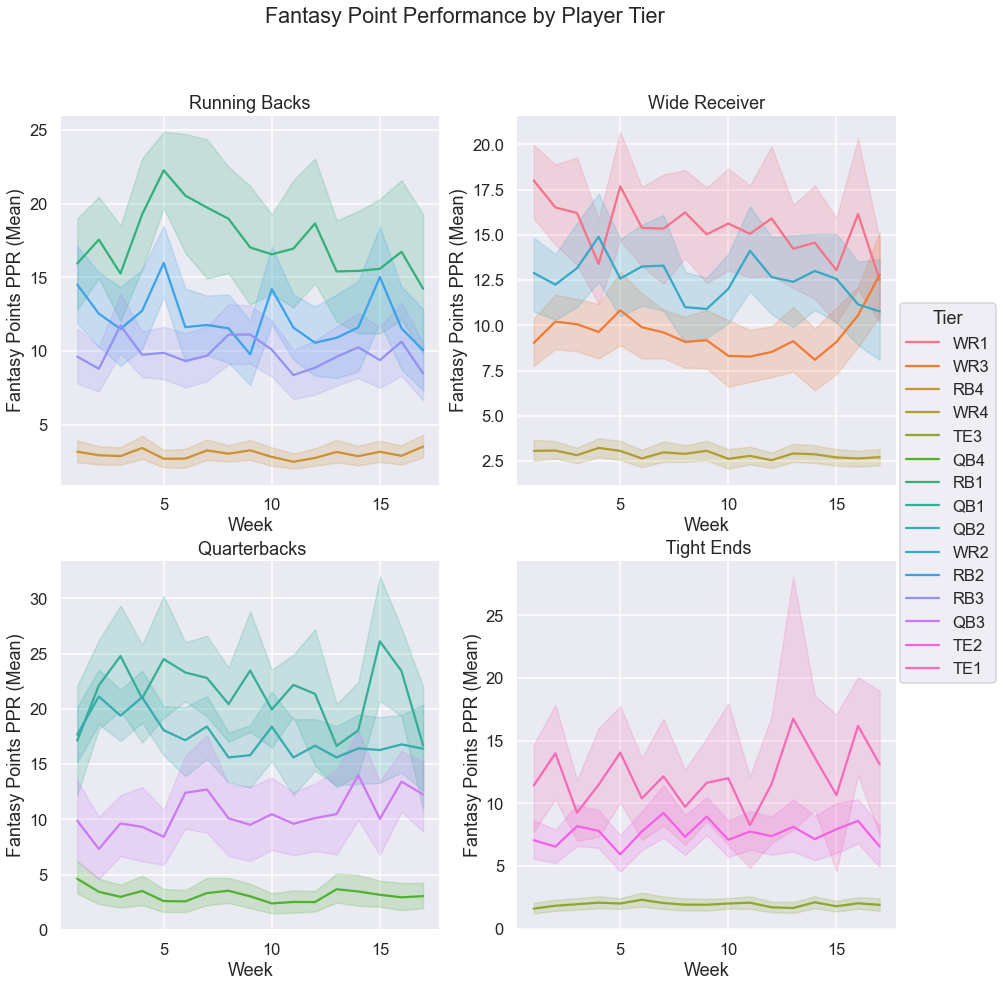

In [71]:
# Create a facet plot of the big 4 positions illustrating the performance differences between 
# the various tiers that have been assigned.

sns.set_theme(style = 'darkgrid')
# Set context of seaborn plots to 'talk'
sns.set_context(context = 'talk')
              
fig, axes = plt.subplots(2, 2, figsize=(15, 15), 
                         sharey=False)
fig.suptitle('Fantasy Point Performance by Player Tier')

# Running Backs
sns.lineplot(ax=axes[0,0], x = df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='RB']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False).set(ylabel = 'Fantasy Points PPR (Mean)')


axes[0,0].set_title('Running Backs')

# Wide Receiver
sns.lineplot(ax=axes[0,1], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='WR']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False).set(ylabel = 'Fantasy Points PPR (Mean)')
axes[0,1].set_title('Wide Receiver')


# Quarterbacks
sns.lineplot(ax=axes[1,0], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='QB']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False).set(ylabel = 'Fantasy Points PPR (Mean)')
axes[1,0].set_title(' Quarterbacks')


# Tight Ends
sns.lineplot(ax=axes[1,1], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='TE']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False).set(ylabel = 'Fantasy Points PPR (Mean)')
axes[1,1].set_title(' Tight Ends')

fig.legend(title = 'Tier', 
           labels = df_tier['PlayerTier'].unique().tolist(),
          loc = 'right')

### How do players perform when their team is scoring more

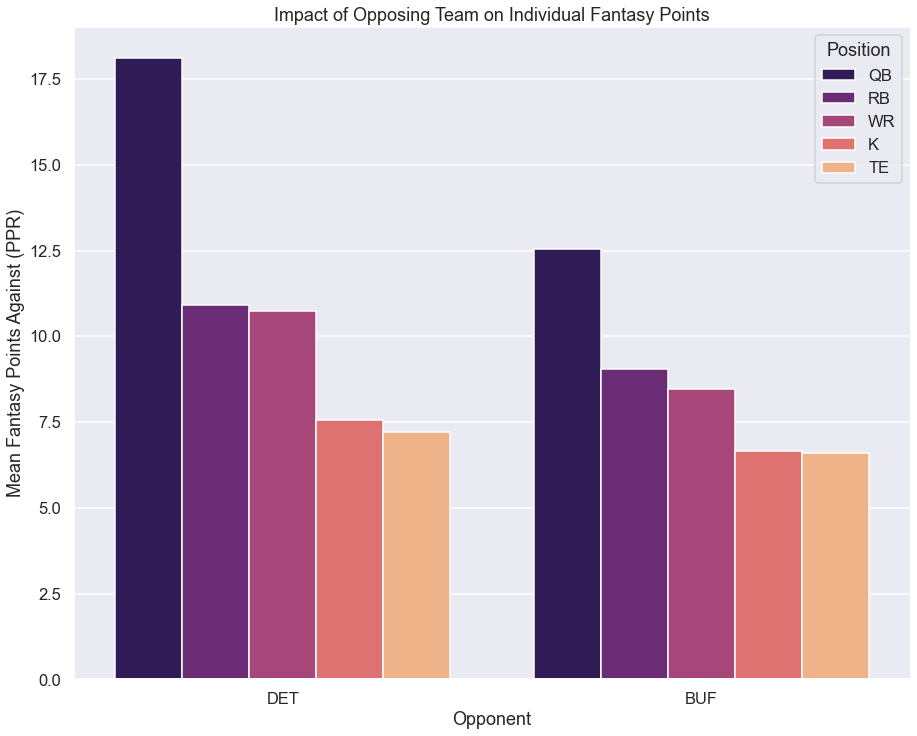

In [73]:
# Create a new dataframe showing the average fantasy points each team allowed against them
plt.figure(figsize = (15, 12))
df_opposition = df_rolling[df_rolling['FantasyPointsPPR'] > 0][[ 'Opponent', 'FantasyPointsPPR', 'Position']].groupby(by = ['Opponent', 'Position']).mean().reset_index().sort_values(by = 'FantasyPointsPPR', ascending = False)


fig = sns.barplot(x = df_opposition[(df_opposition['Opponent'] == 'BUF') | (df_opposition['Opponent'] == 'DET')]['Opponent'],
           y = df_opposition['FantasyPointsPPR'],
           hue = df_opposition['Position'],
           palette = 'magma').set(title = 'Impact of Opposing Team on Individual Fantasy Points',
                                 ylabel = 'Mean Fantasy Points Against (PPR)')

### Data Describe

In [ ]:
df_rolling.to_csv('Data/df_rolling.csv')